# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

# Prepare Data

## Import 

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Exploratory Data Analysis ()

In [4]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
corr_matrix = df.select_dtypes(include=['number']).corr()

In [10]:
corr = corr_matrix.drop(columns=["Exam_Score"]).corr()
corr.style.background_gradient(axis=None)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
Hours_Studied,1.000000,-0.085198,-0.206872,-0.125029,-0.230346,-0.218356
Attendance,-0.085198,1.000000,-0.263846,-0.201003,-0.142574,-0.269575
Sleep_Hours,-0.206872,-0.263846,1.000000,-0.230498,-0.212903,-0.159445
Previous_Scores,-0.125029,-0.201003,-0.230498,1.000000,-0.220055,-0.213586
Tutoring_Sessions,-0.230346,-0.142574,-0.212903,-0.220055,1.000000,-0.150425
Physical_Activity,-0.218356,-0.269575,-0.159445,-0.213586,-0.150425,1.000000


In [11]:
def plot_numerical_vs_target(df, num_col):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=df[num_col], y=df["Exam_Score"])
    plt.title(f"Exam_Score Distribution by {num_col}")
    plt.xlabel(num_col)
    plt.ylabel("Exam_Score")
    plt.xticks(rotation=45)  
    plt.show()

In [12]:
num = df.select_dtypes(include=['number'])
num.drop(columns=['Exam_Score'],inplace=True)
num.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
0,23,84,7,73,0,3
1,19,64,8,59,2,4
2,24,98,7,91,2,4
3,29,89,8,98,1,4
4,19,92,6,65,3,4


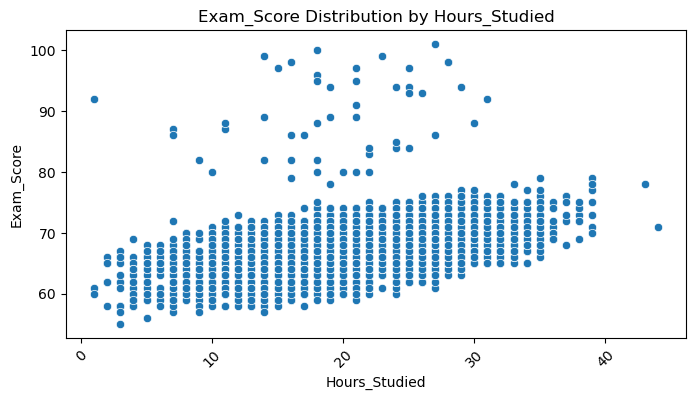

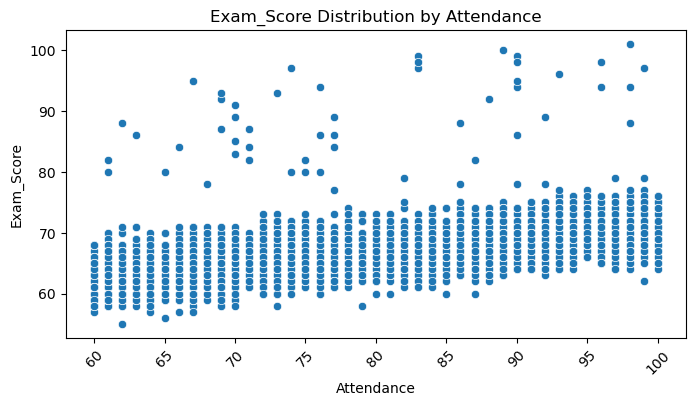

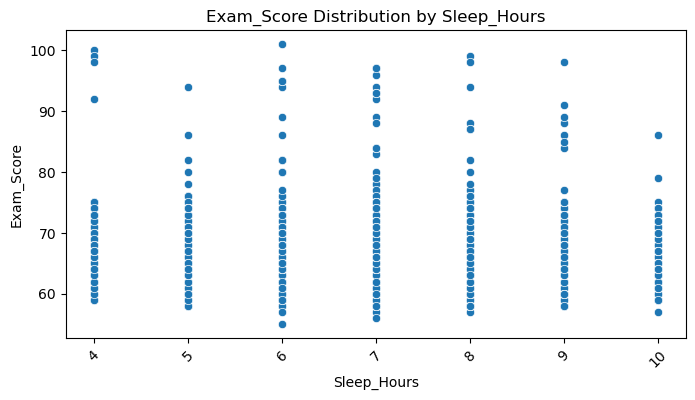

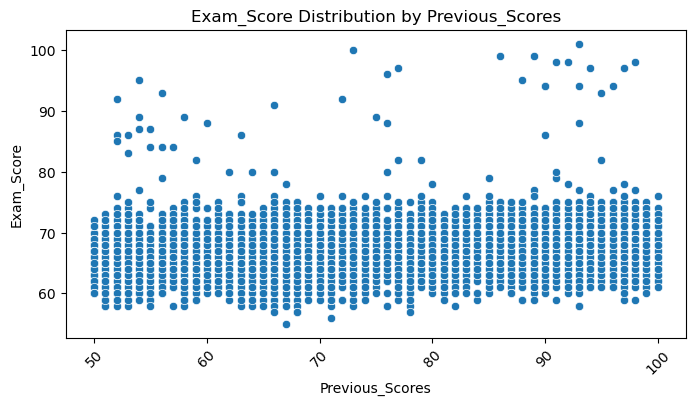

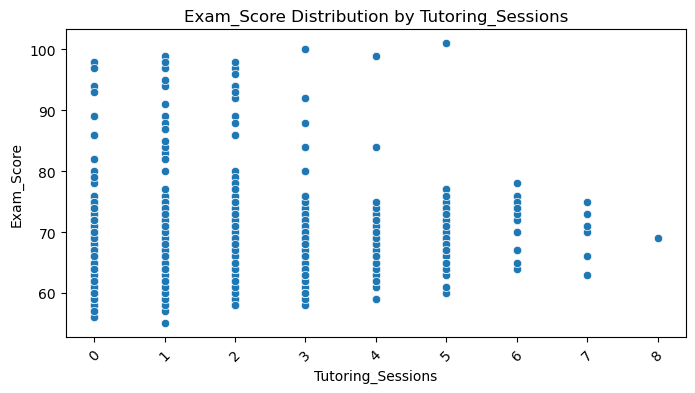

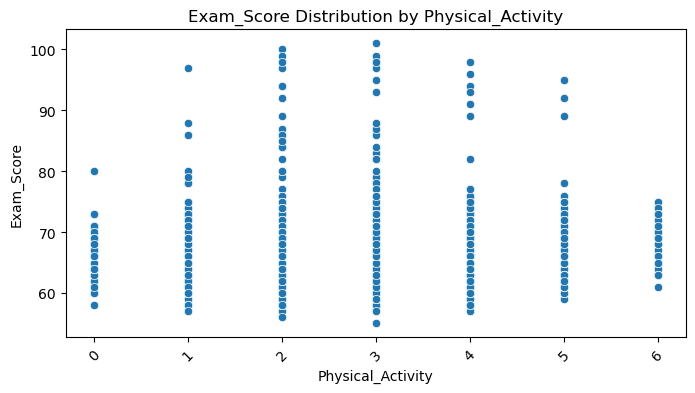

In [13]:
for col in num.columns:
 plot_numerical_vs_target(df,col) 

In [14]:
def plot_categorical_vs_target(df, categorical_col):
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=df[categorical_col], y=df["Exam_Score"], palette="viridis")
    plt.title(f"Exam_Score Distribution by {categorical_col}")
    plt.xlabel(categorical_col)
    plt.ylabel("Exam_Score")
    plt.xticks(rotation=45) 
    plt.show()

In [15]:
cat = df.select_dtypes(include=['object'])
cat.head()

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female


In [16]:
cat["Parental_Involvement"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

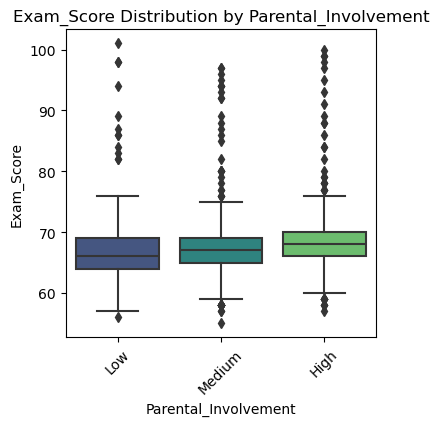

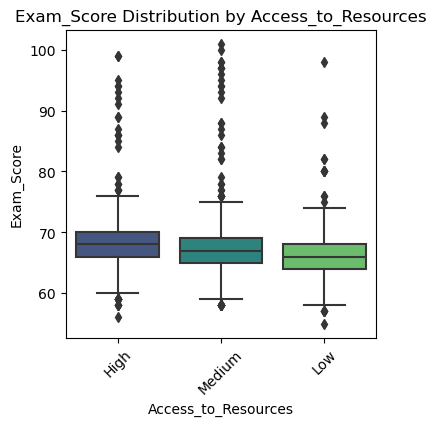

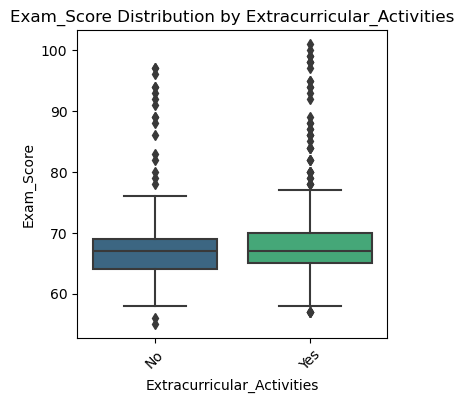

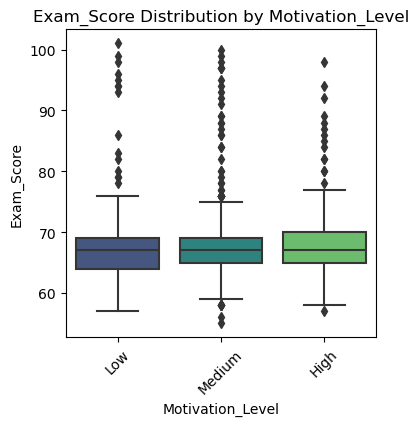

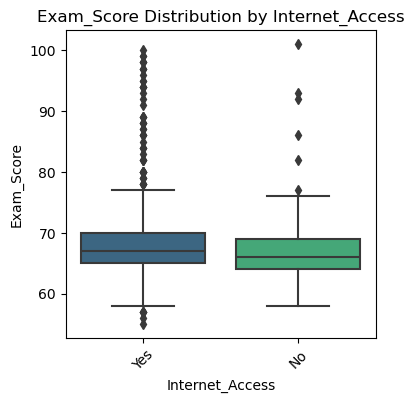

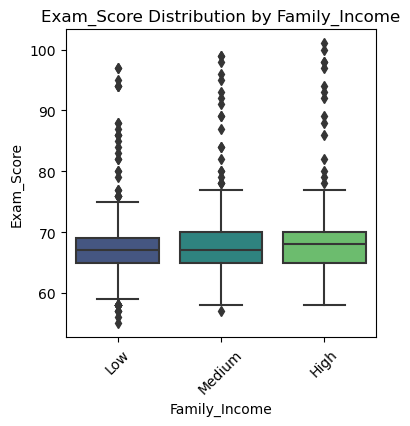

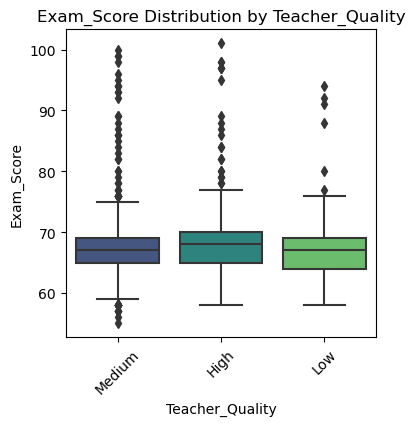

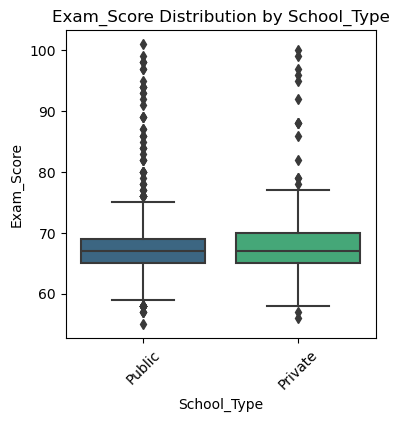

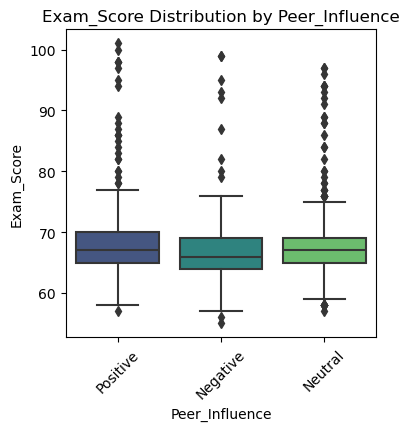

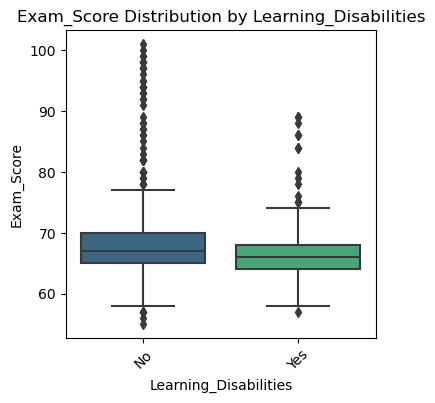

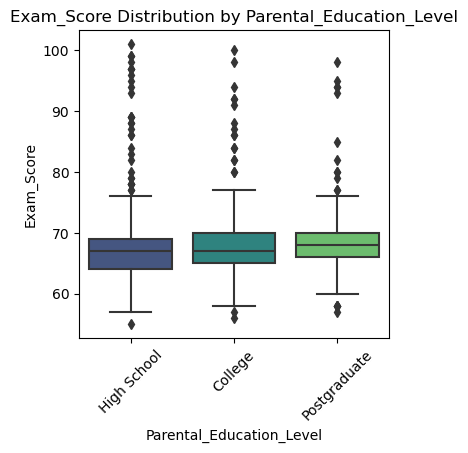

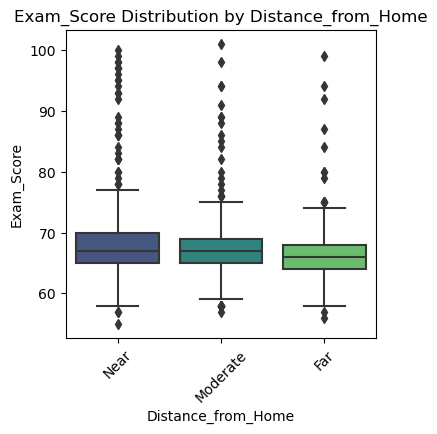

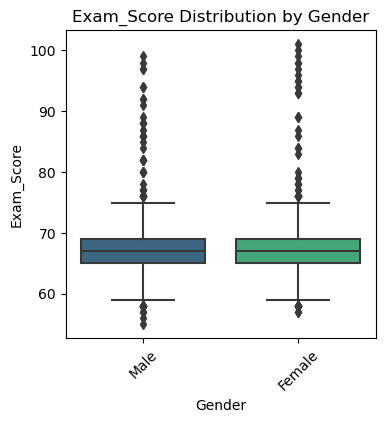

In [17]:
for col in cat.columns:
 plot_categorical_vs_target(df,col)  

## Spliting Data

In [18]:
# Creating a feature matrix X and a target vector y
target = "Exam_Score"
X = df.drop(columns=[target])
Y = df[target]

print("X shape:", X.shape)
print("y shape:", Y.shape)

X shape: (6607, 19)
y shape: (6607,)


In [19]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female


In [20]:
Y

0       67
1       61
2       74
3       71
4       70
        ..
6602    68
6603    69
6604    68
6605    68
6606    64
Name: Exam_Score, Length: 6607, dtype: int64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2, 
    random_state=42
)

In [22]:
print(f"x train: {X_train.shape} | y train: {Y_train.shape} | x test: {X_test.shape} | y test: {Y_test.shape} | ")

x train: (5285, 19) | y train: (5285,) | x test: (1322, 19) | y test: (1322,) | 


## Transform Data

### missing values

In [23]:
X_train.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               60
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      69
Distance_from_Home            51
Gender                         0
dtype: int64

In [24]:
# Identifying rows where all 3 columns contain  NaN
rows_to_drop = X_train[X_train[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isna().all(axis=1)].index

In [25]:
rows_to_drop

Index([], dtype='int64')

In [26]:
X_train.fillna({'Teacher_Quality': X_train['Teacher_Quality'].mode()[0]}, inplace=True)
X_train.fillna({'Parental_Education_Level': X_train['Parental_Education_Level'].mode()[0]}, inplace=True)
X_train.fillna({'Distance_from_Home': X_train['Distance_from_Home'].mode()[0]}, inplace=True)

In [27]:
X_train.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
dtype: int64

## Categorical Data

In [28]:
encoder = OrdinalEncoder()
X_train_encoded = X_train.copy()
X_train_encoded[cat.columns] = encoder.fit_transform(X_train[cat.columns]).astype(int)

In [29]:
X_train.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
5810,27,79,Low,High,Yes,8,63,High,Yes,2,Low,Medium,Public,Negative,5,No,College,Moderate,Female
1268,16,86,High,Medium,Yes,7,94,Medium,Yes,2,Low,High,Public,Neutral,3,No,High School,Moderate,Female
414,22,87,Low,Medium,No,8,83,Low,Yes,1,Low,Medium,Public,Neutral,1,No,College,Far,Male
4745,18,100,High,Medium,Yes,10,86,Medium,Yes,1,Medium,Medium,Public,Neutral,3,No,High School,Near,Male
654,35,78,High,Low,Yes,10,99,Medium,Yes,1,Low,Medium,Private,Positive,2,No,High School,Near,Male


In [30]:
X_train_encoded.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
5810,27,79,1,0,1,8,63,0,1,2,1,2,1,0,5,0,0,1,0
1268,16,86,0,2,1,7,94,2,1,2,1,0,1,1,3,0,1,1,0
414,22,87,1,2,0,8,83,1,1,1,1,2,1,1,1,0,0,0,1
4745,18,100,0,2,1,10,86,2,1,1,2,2,1,1,3,0,1,2,1
654,35,78,0,1,1,10,99,2,1,1,1,2,0,2,2,0,1,2,1


## Scaling 

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)  

## Using Pipeline

In [32]:
# Defining columns
numerical_cols = num.columns
categorical_cols = cat.columns

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())  
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  
])

# Combining transformations
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

## Model Building 

In [33]:
# Full pipeline with support vector Regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR())
])

In [34]:
# Fitting pipeline on training data
model_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('en...
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object'))])),
                ('svr', SVR())])

In [35]:

# Prediction on test data
y_pred = model_pipeline.predict(X_test)

## Evaluate Model

In [36]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 3.4201764119781912
Root Mean Squared Error (RMSE): 1.8493718966119799


## Visualize Result

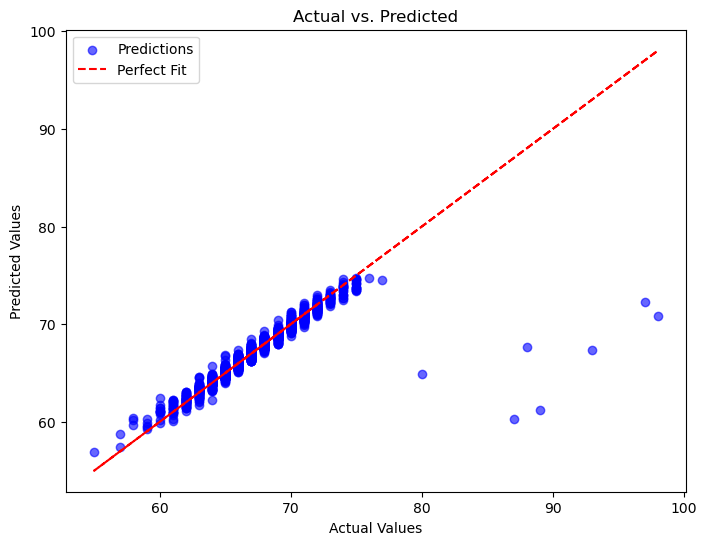

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot(Y_test, Y_test, "--", color="red", label="Perfect Fit")  # Diagonal reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.legend()
plt.show()

## Predicting new instance

In [38]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [39]:
new_instance = [[30,90,'High','High','Yes',5,70,'Medium','Yes',0,'Medium','Medium','Public','Neutral',1,'No','College','Far','Female']] 
new_instance_df = pd.DataFrame(new_instance, columns=X_train.columns)

predicted_score = model_pipeline.predict(new_instance_df)
print(f"Predicted Exam Score: {predicted_score[0]:.2f}")

Predicted Exam Score: 71.03


In [40]:
import pickle 

In [41]:
 #Saving The Model
#pickle.dump(model_pipeline, open("RG_MODEL.pkl", "wb"))

In [42]:
model = pickle.load(open("RG_MODEL.pkl", "rb"))

In [43]:
pred = model.predict(new_instance_df)
round(pred[0])

71